In [1]:
import pandas as pd
from textblob import TextBlob
import re




In [ ]:
scouting_reports = pd.read_csv("scouting_reports.csv")
nba_stats = pd.read_csv("merged_nba_stats2.csv")

# Function to preprocess text
def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text.strip()

# Function to get sentiment scores using TextBlob
def get_textblob_sentiment(text):
    cleaned_text = clean_text(text)
    blob = TextBlob(cleaned_text)
    # TextBlob polarity: -1 (negative) to 1 (positive)
    # TextBlob subjectivity: 0 (objective) to 1 (subjective)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    return polarity, subjectivity

# Apply TextBlob sentiment analysis
scouting_reports[['Polarity Score', 'Subjectivity Score']] = scouting_reports['Scouting Report'].apply(
    lambda x: pd.Series(get_textblob_sentiment(x))
)

# Rename columns in NBA stats dataset for clarity
nba_stats.rename(columns={
    'Player': 'Player Name',
    'Min': 'Player Minutes Played',
    '+/-': 'Player Plus Minus',
    'PER': 'Player PER',
    'WS': 'Player WS',
    'VORP': 'Player VORP',
    'Awards': 'Player Awards'
}, inplace=True)

# Select relevant columns from NBA stats
nba_stats_filtered = nba_stats[['Player Name', 'Player Minutes Played', 'Player Plus Minus', 
                                'Player PER', 'Player WS', 'Player VORP', 'Player Awards']]

merged_data = pd.merge(scouting_reports, nba_stats_filtered, on='Player Name', how='inner')
merged_data.to_csv("merged_nba_rookie_data_textblob.csv", index=False)

print(merged_data.head())

         Player Name                                    Scouting Report  \
0  Victor Wembanyama  Analysis\nNBA Comparison: Ralph Sampson\nStren...   
1     Brandon Miller  Analysis\nNBA Comparison: Paul George\nStrengt...   
2    Scoot Henderson  Analysis\nNBA Comparison: Derrick Rose/Ja Mora...   
3      Amen Thompson  Analysis\nNBA Comparison: Latrell Sprewell\nSt...   
4     Ausar Thompson  Analysis\nNBA Comparison: Trevor Ariza\nStreng...   

   Polarity Score  Subjectivity Score  Player Minutes Played  \
0        0.154434            0.484801                   29.7   
1        0.194027            0.514716                   32.2   
2        0.176838            0.510104                   28.5   
3        0.180483            0.480269                   22.4   
4        0.222045            0.490818                   25.1   

   Player Plus Minus  Player PER  Player WS  Player VORP Player Awards  
0               -2.0        23.1        3.7          3.8  ROY-1,DPOY-2  
1               -6

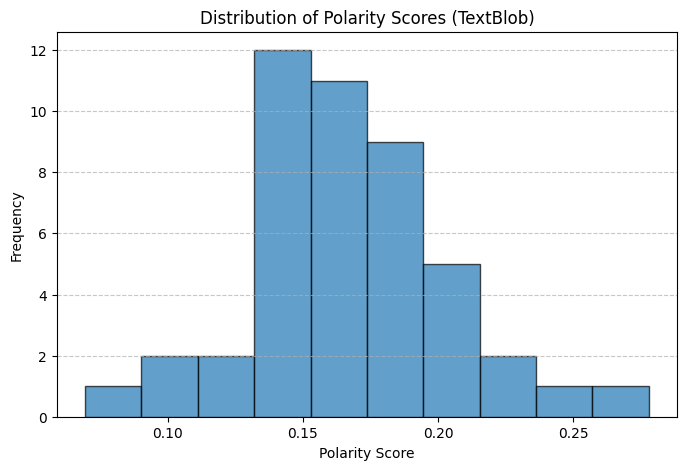

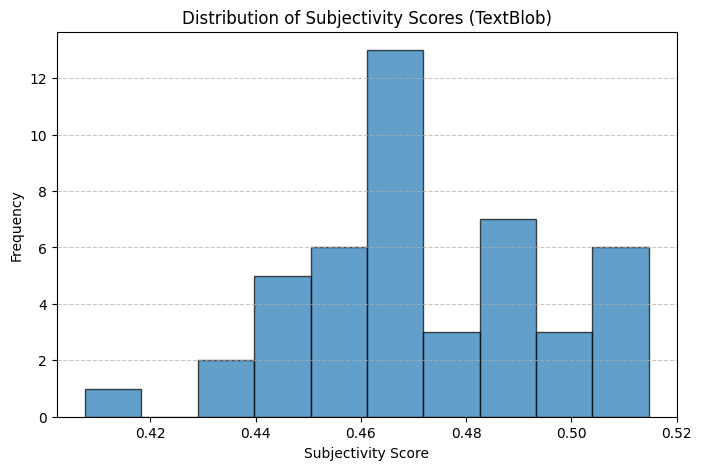

In [ ]:
import matplotlib.pyplot as plt

merged_data = pd.read_csv("merged_nba_rookie_data_textblob.csv")

# Plot 1: Distribution of Polarity Scores
plt.figure(figsize=(8, 5))
plt.hist(merged_data['Polarity Score'], bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Polarity Scores (TextBlob)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot 2: Distribution of Subjectivity Scores
plt.figure(figsize=(8, 5))
plt.hist(merged_data['Subjectivity Score'], bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Subjectivity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Subjectivity Scores (TextBlob)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [4]:
# Compare Vader and TextBlob sentiment analysis
textblob_data = pd.read_csv("rookie_data_textblob.csv")
vader_data = pd.read_csv("rookie_data_vader.csv")

# Select sentiment columns
textblob_columns = ['Polarity Score', 'Subjectivity Score']
vader_columns = ['Compound Sentiment Score', 'Positive Sentiment Score', 'Negative Sentiment Score', 'Neutral Sentiment Score']

# Calculate standard deviation (variation) for sentiment scores
textblob_variation = textblob_data[textblob_columns].std()
vader_variation = vader_data[vader_columns].std()

# Combine results into a comparison DataFrame
variation_comparison = pd.DataFrame({
    'TextBlob Variation (std)': textblob_variation,
    'VADER Variation (std)': vader_variation
})

# Display the comparison of variation
print(variation_comparison)


                          TextBlob Variation (std)  VADER Variation (std)
Compound Sentiment Score                       NaN               0.001874
Negative Sentiment Score                       NaN               0.015295
Neutral Sentiment Score                        NaN               0.029154
Polarity Score                            0.037268                    NaN
Positive Sentiment Score                       NaN               0.020314
Subjectivity Score                        0.023671                    NaN
